**Implementation of CART**
NAME: GAUTHAM P HARISH REGNO: 21BCE5382

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

*Classifiation*



Dataset Description:
This dataset is related to red variants of the Portuguese "Vinho Verde" wine. The dataset provides information about the amount of various chemicals present in wine and their effect on its quality. The datasets can be viewed as either classification or regression tasks. It's important to note that the classes are ordered and not balanced, meaning there are more normal wines than excellent or poor ones. The task is to predict the quality of wine using the given data.

This project is both simple and challenging, requiring the anticipation of wine quality. The complexity arises from the dataset having fewer samples and being highly imbalanced. The goal is to overcome these obstacles and build a good predictive model for wine quality classification.

Data Frame Columns:
Input variables (based on physicochemical tests):

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
Output variable (based on sensory data):
12. quality (score between 0 and 10)



Exploratory Analytics

In [2]:

data=pd.read_csv("Downloads/archive (5)/winequality-red.csv")
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
data.describe().transpose()

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: >

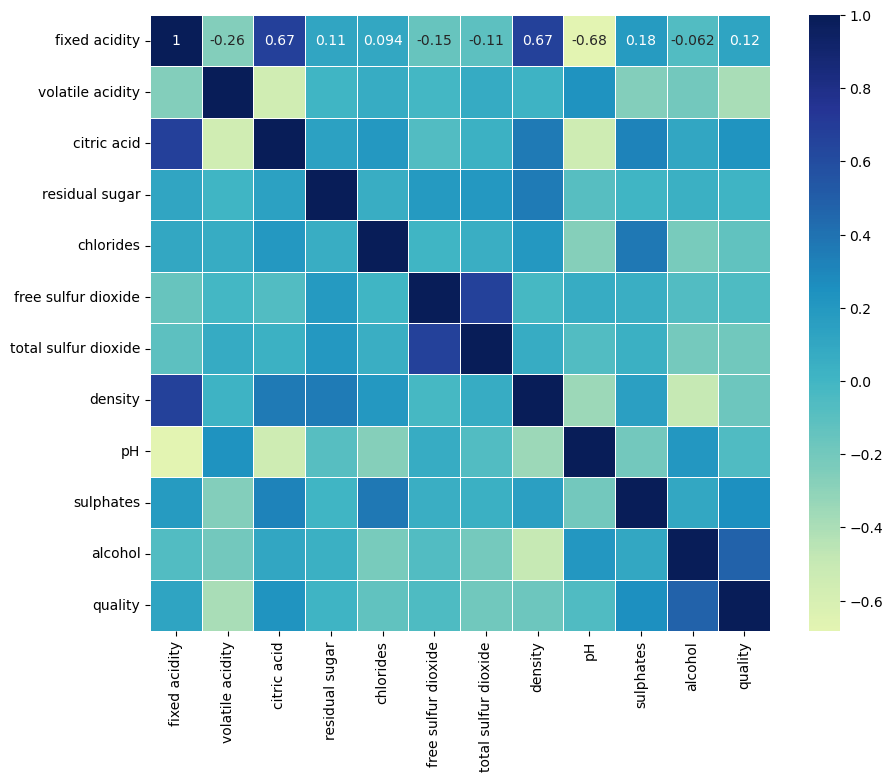

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,lw=.5,center=0,cmap="YlGnBu")

<Axes: title={'center': 'Quality of Wine'}, xlabel='quality'>

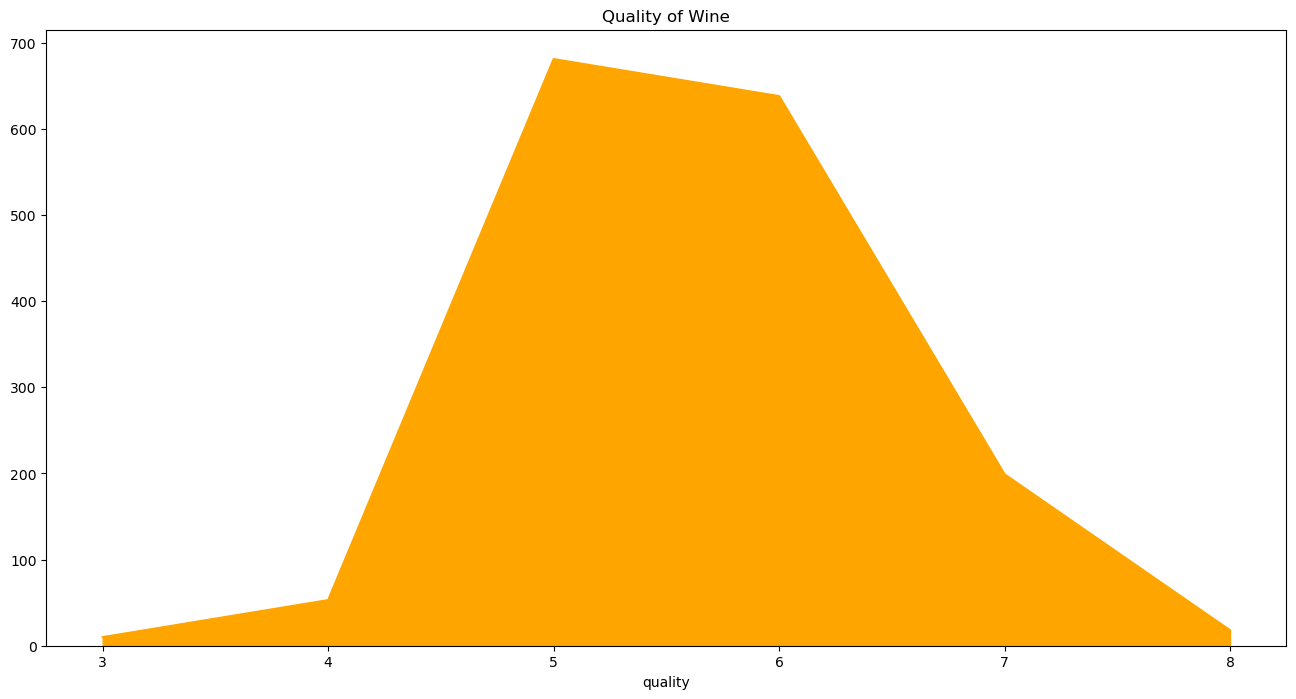

In [7]:
data['quality'].value_counts().sort_index().plot.area(figsize=(16,8),title='Quality of Wine',color='orange')

C:\Users\gauth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gauth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='residual sugar', ylabel='quality'>

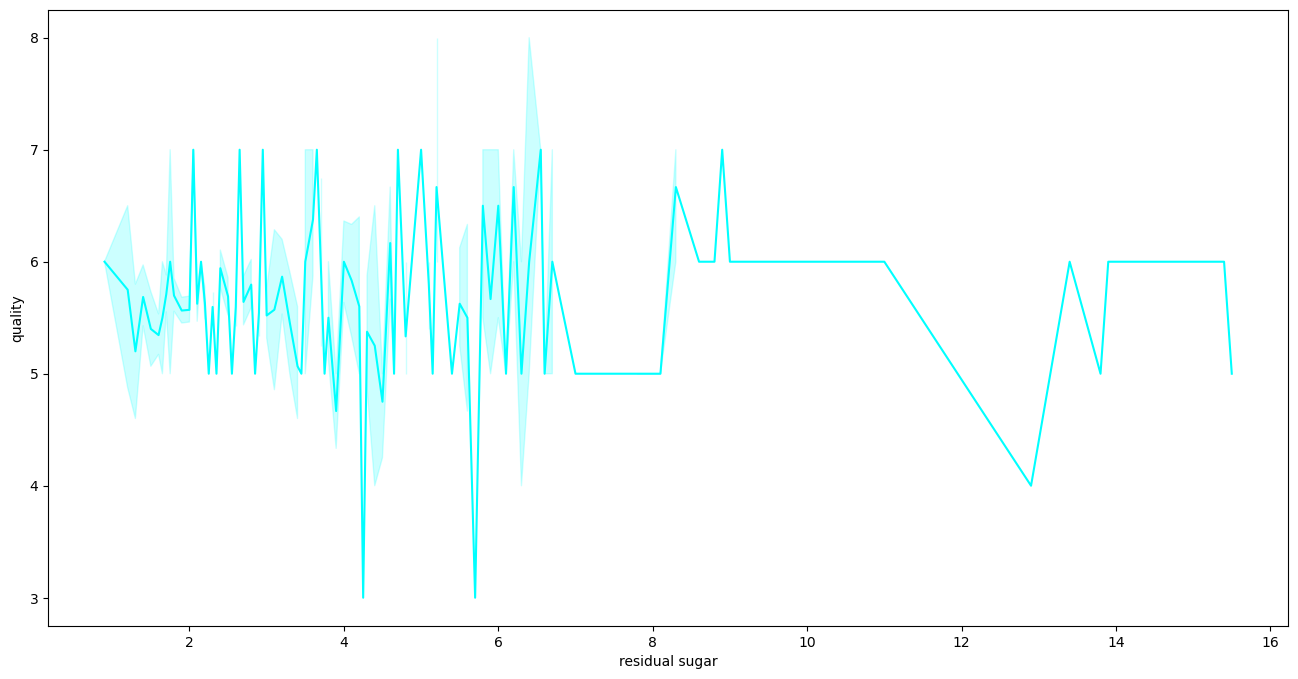

In [8]:
plt.figure(figsize=(16,8))
sns.lineplot(x='residual sugar',y='quality',data=data,color='cyan')

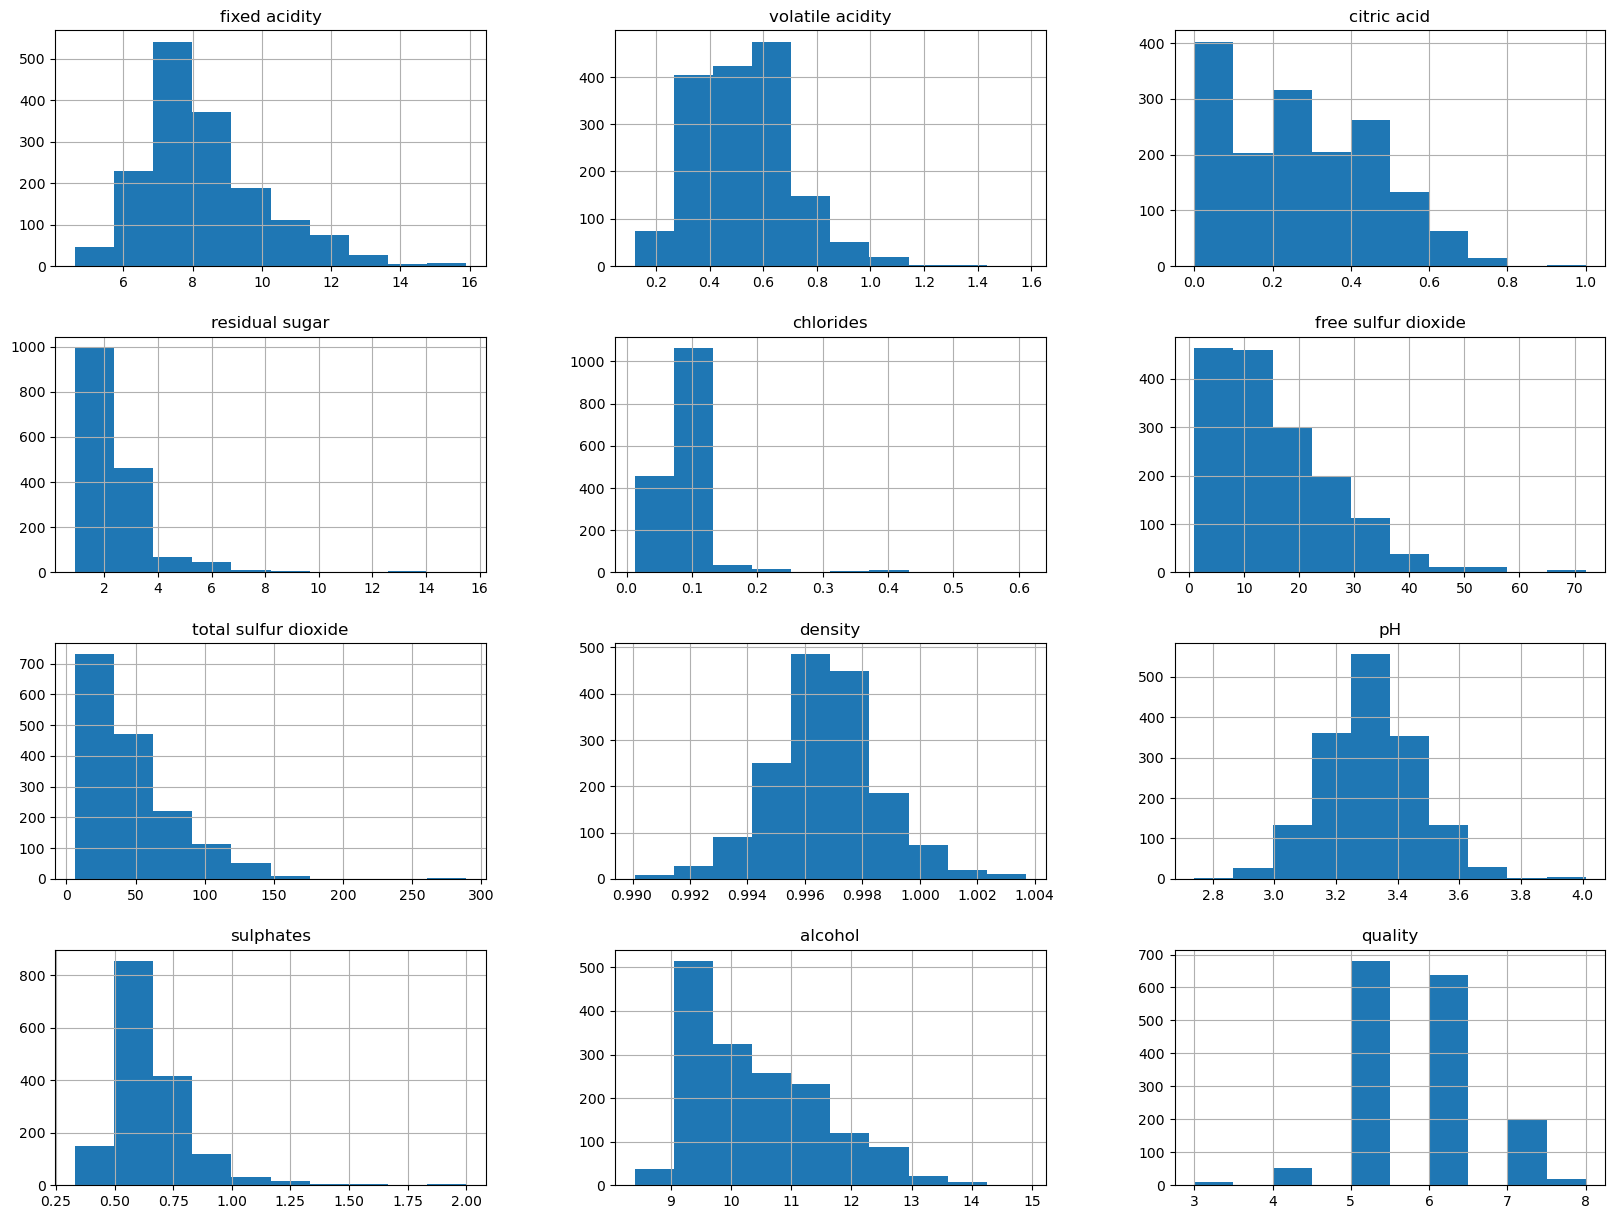

In [9]:
data.hist(figsize=(20,15))
plt.show()

C:\Users\gauth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gauth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gauth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gauth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

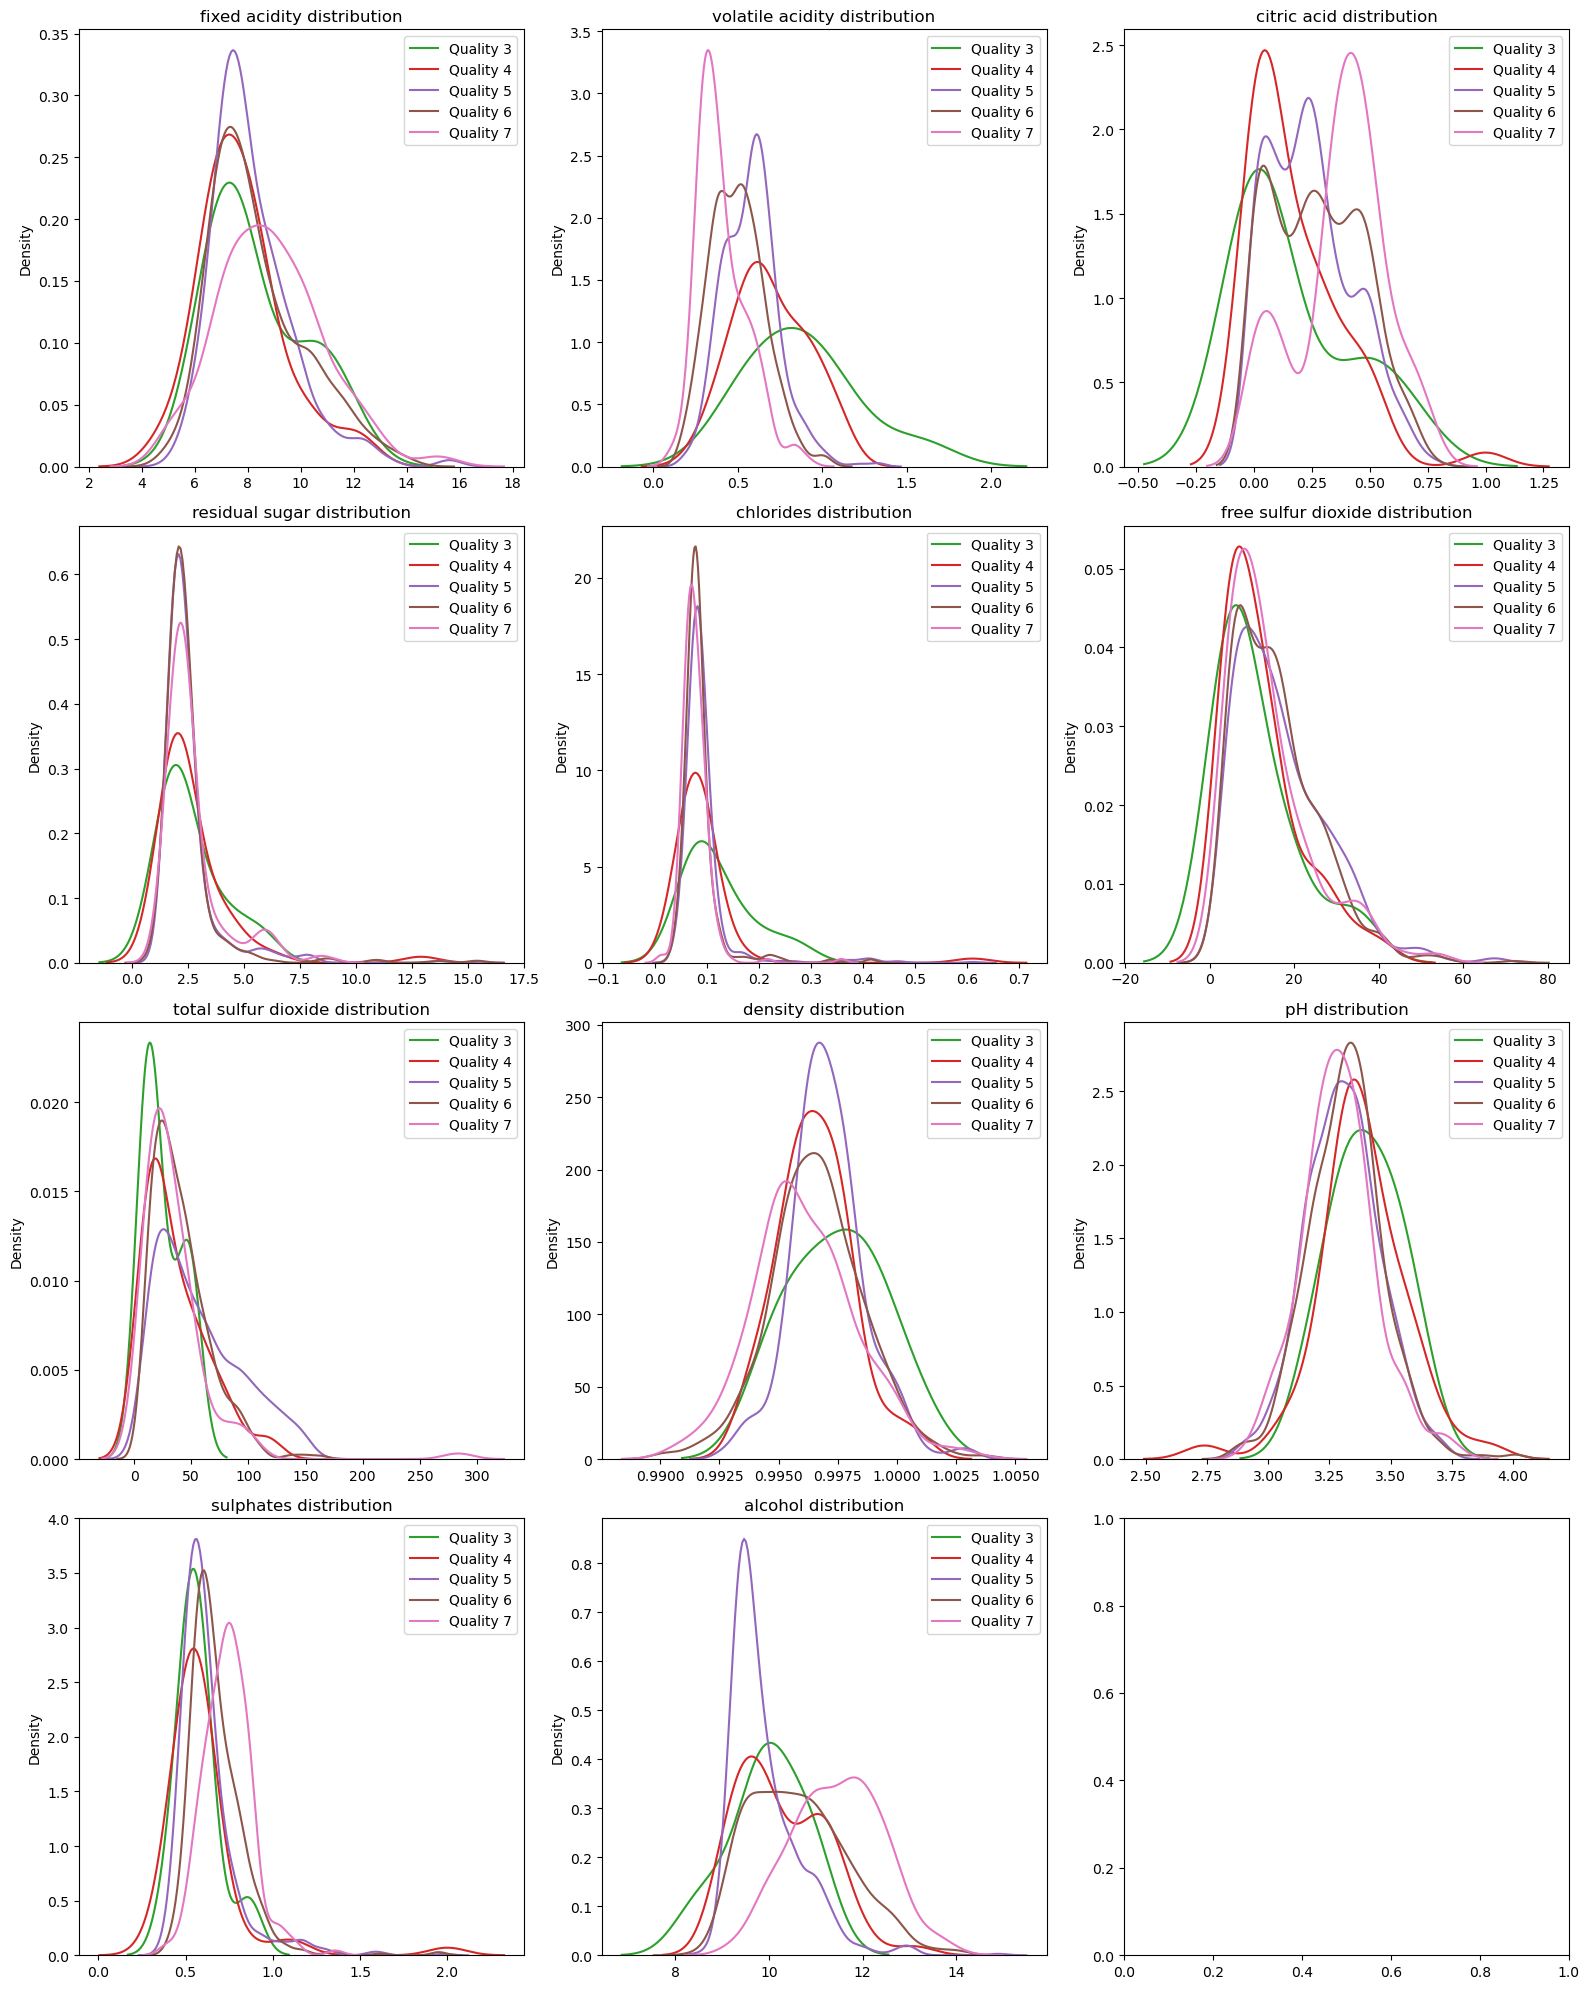

In [10]:

cols_to_draw = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                'pH', 'sulphates', 'alcohol']
cols = 3
rows = int(np.ceil(len(cols_to_draw) / cols))
fig, ax = plt.subplots(rows, cols, figsize=(16, rows * 5))
ax = ax.flatten()

quality_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']

for x, col in enumerate(cols_to_draw):
    for quality in range(1, 8):
        sns.kdeplot(data=data[data['quality'] == quality][col], ax=ax[x], color=quality_colors[quality - 1],
                    common_norm=False, label=f'Quality {quality}')
    ax[x].set_title(f'{col} distribution')
    ax[x].set_xlabel(None)
    ax[x].legend()

plt.tight_layout()
plt.show()

Text(0.5, 0, 'Value')

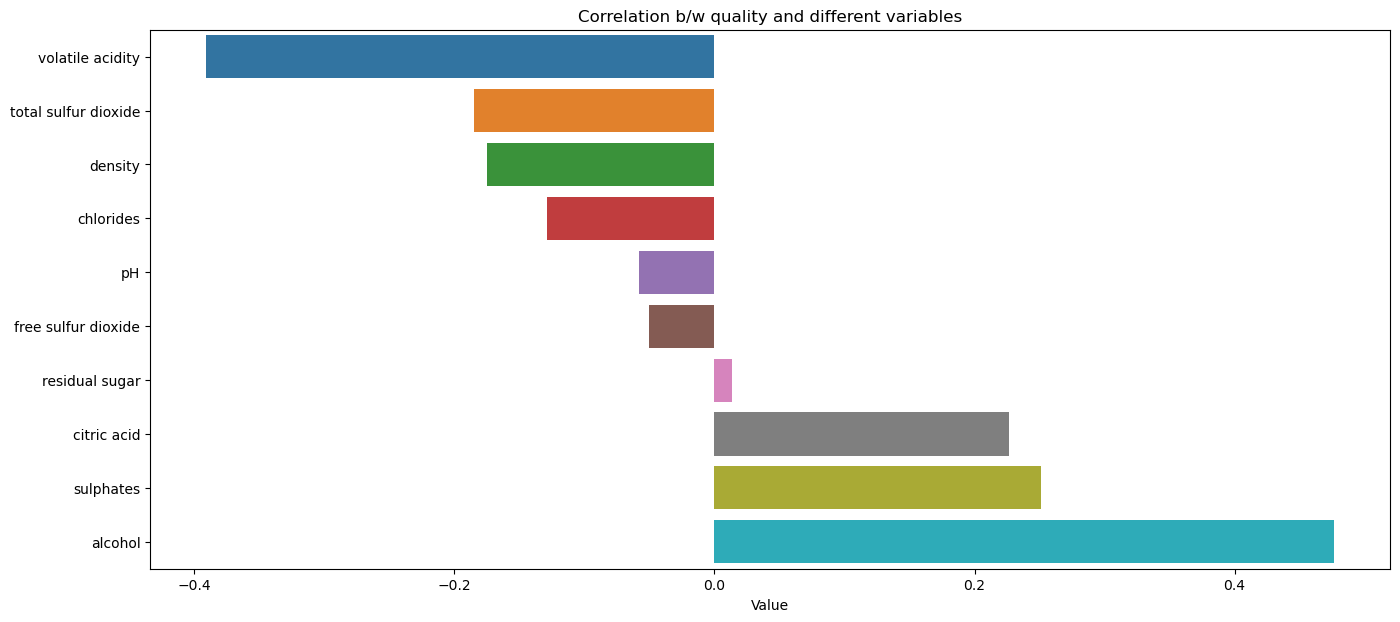

In [11]:
d_corr=data.corr()['quality'][1:].drop('quality',axis=0)

plt.figure(figsize=(16,7))
plt.title('Correlation b/w quality and different variables')
sns.barplot(y=d_corr.sort_values().index,x=d_corr.sort_values().values)
plt.xlabel('Value')


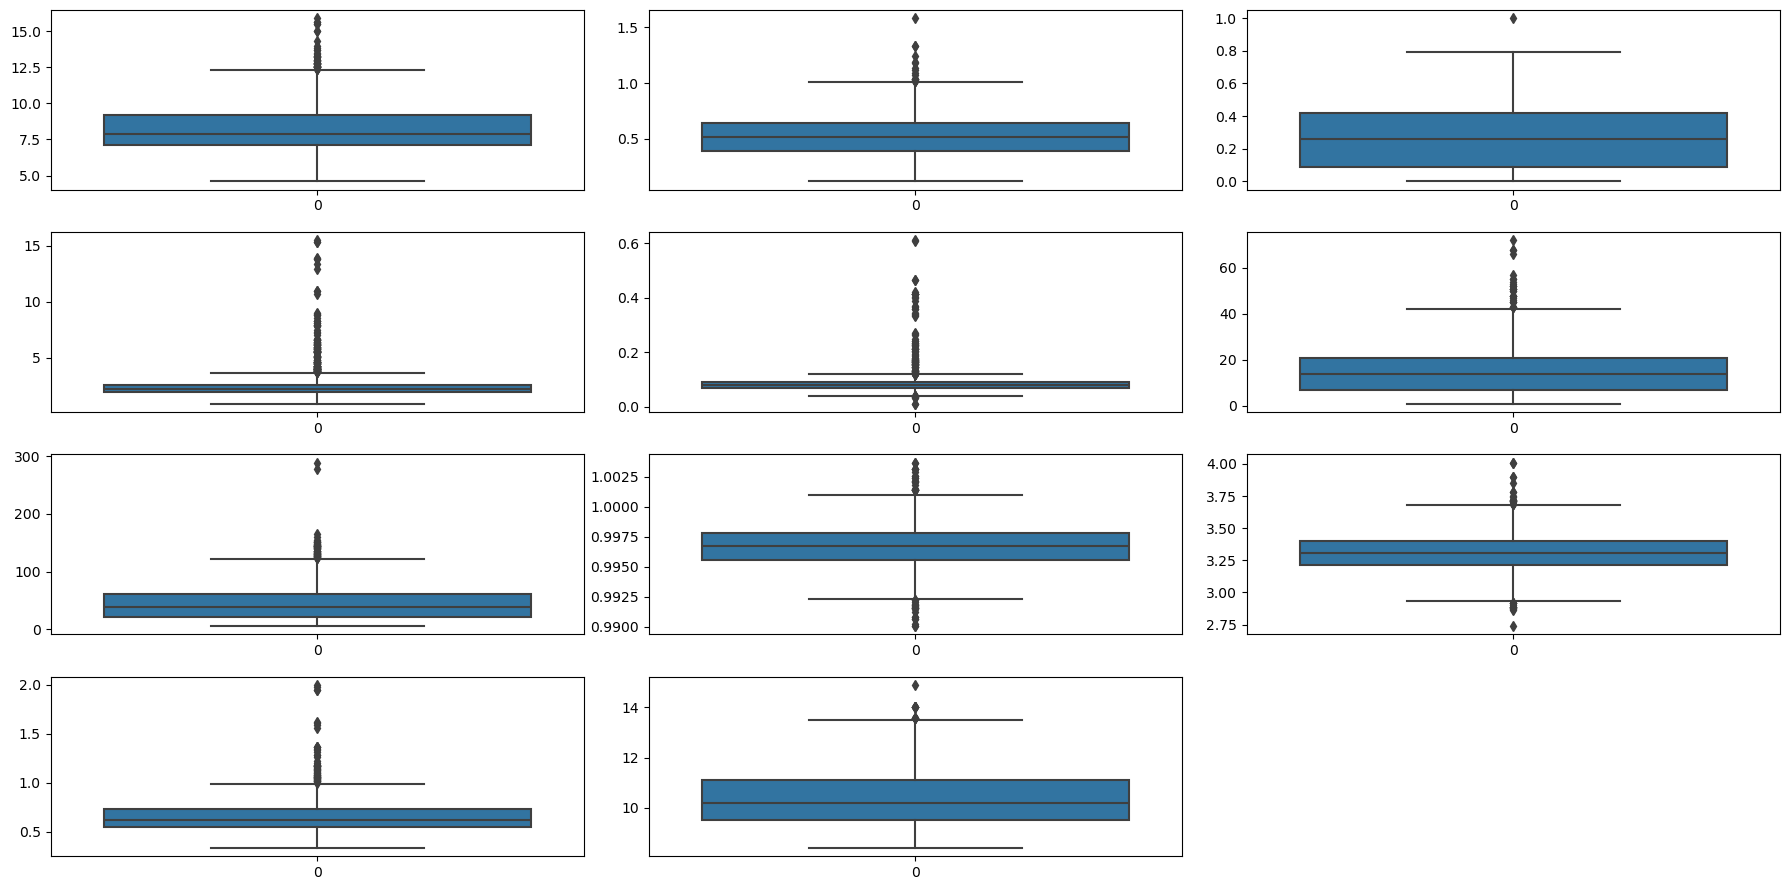

In [12]:
plt.figure(figsize=(18,9))
o_count=1
for i in cols_to_draw:
    plt.subplot(4,3,o_count)
    sns.boxplot(data[i])
    o_count=o_count+1
plt.tight_layout()    

In [13]:
df=data.copy()
df.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [14]:
df['quality']=df['quality'].map({3:'Bad',4:'Bad',5:'Bad',6:'Good',7:'Good',8:'Good'})
df['quality'].value_counts()

quality
Good    855
Bad     744
Name: count, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['quality']=le.fit_transform(df['quality'])
df['quality'].value_counts()

quality
1    855
0    744
Name: count, dtype: int64

In [16]:
x=df.drop(['quality'],axis=1)
y=df.quality

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=30)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1199, 11)
(1199,)
(400, 11)
(400,)


In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

**Methodology AND  Result Analysis**

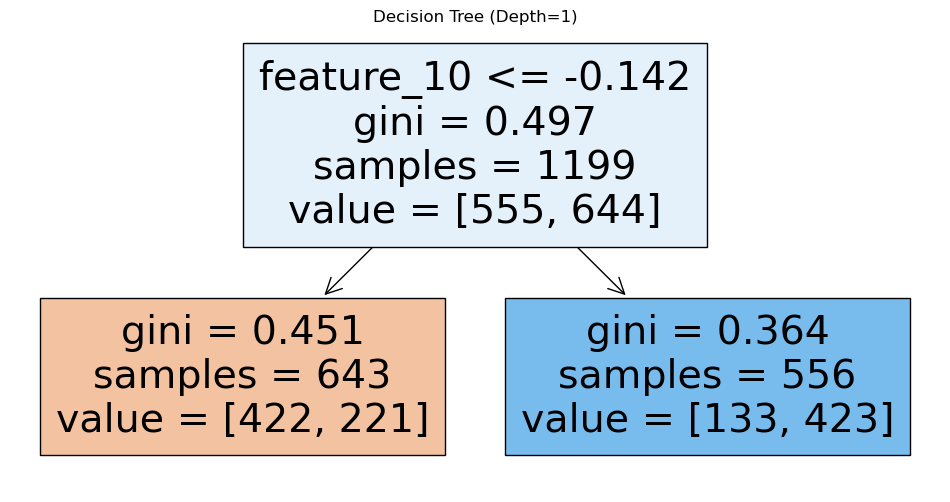

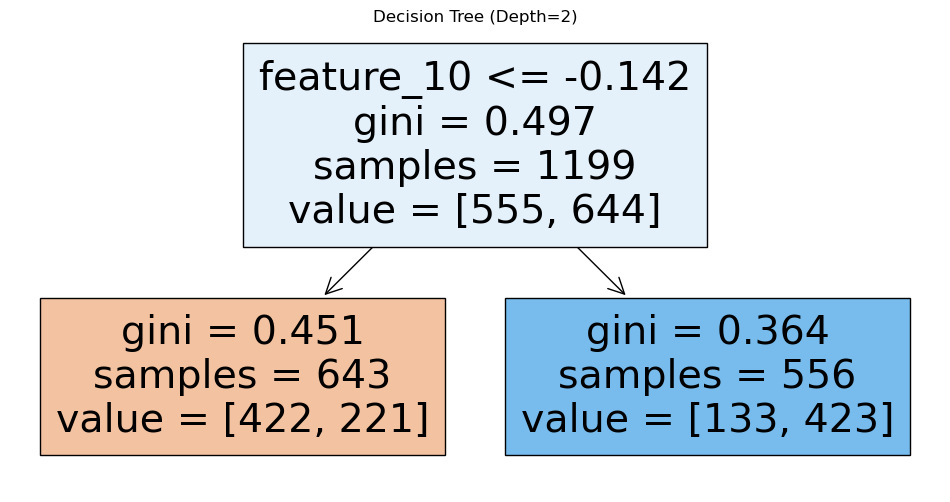

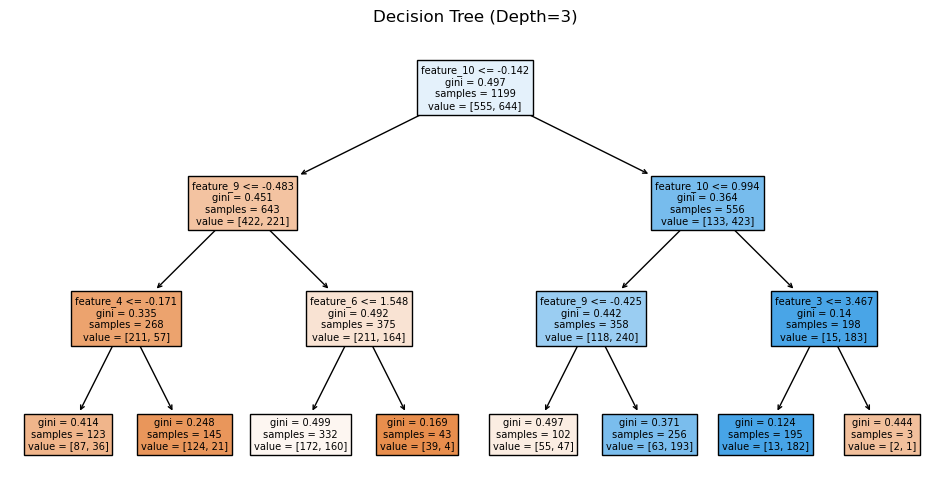

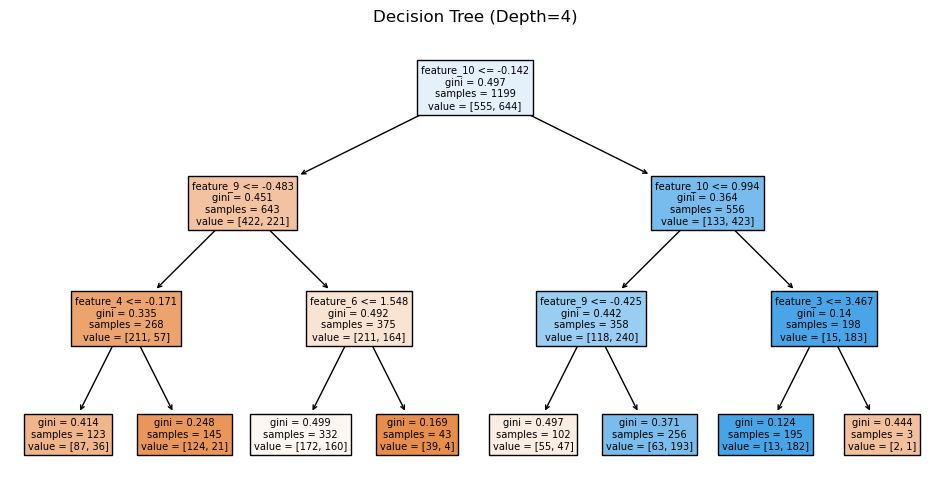

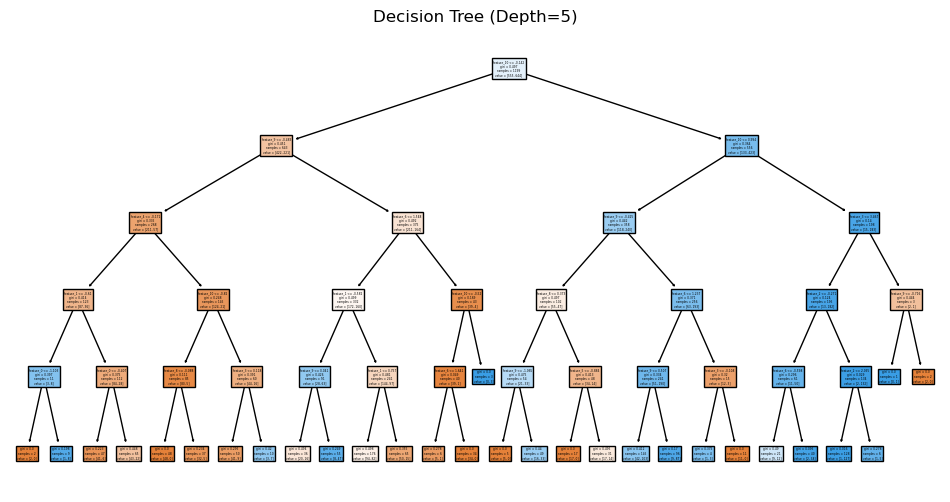

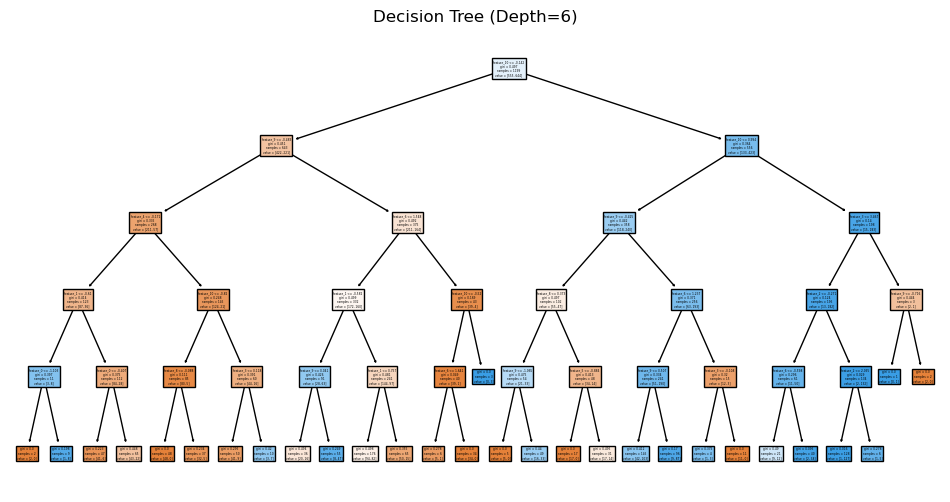

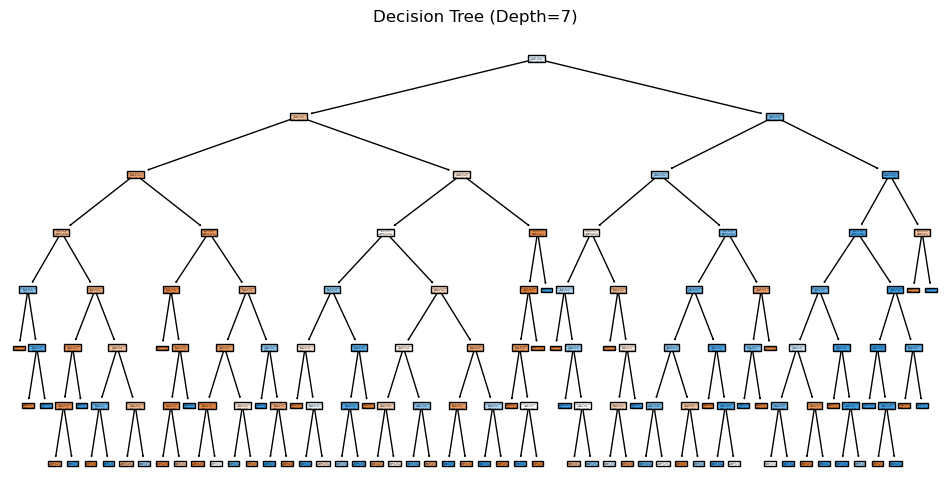

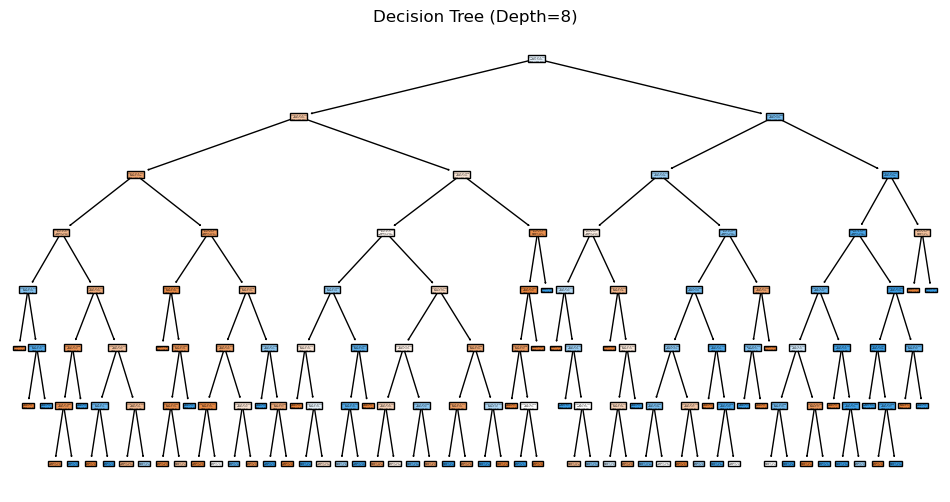

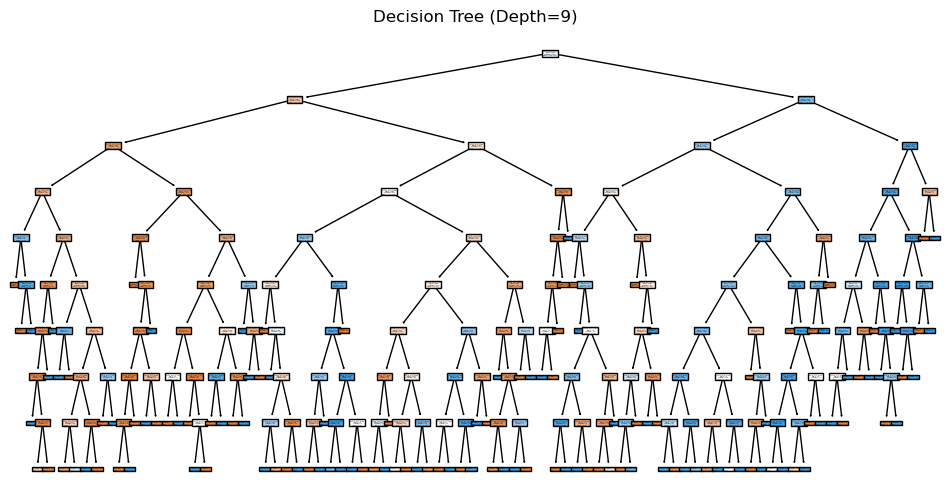

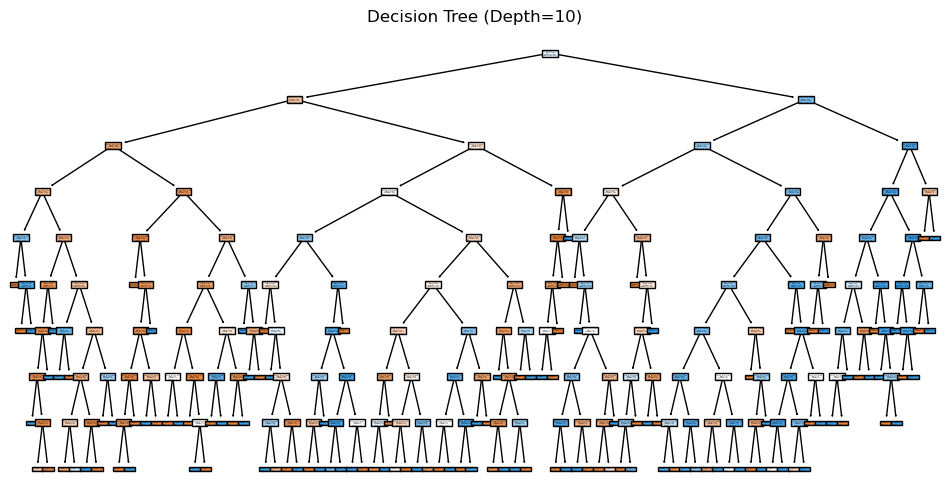

In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming you have your data loaded and split into x_train, x_test, y_train, y_test

# Create a list to store results
results_list = []
# Create a list to store trained models
models_list = []

# Train five different decision tree models
for i in range(1, 11, 2):
    max_depth = i
    
    # Using Gini impurity
    model_gini = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model_gini.fit(x_train, y_train)
    models_list.append(model_gini)
    
    # Using CART (Classification and Regression Trees)
    model_cart = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, random_state=42)
    model_cart.fit(x_train, y_train)
    models_list.append(model_cart)
    
    # Predictions for Gini impurity
    y_train_preds_gini = model_gini.predict(x_train)
    y_test_preds_gini = model_gini.predict(x_test)
    
    # Predictions for CART
    y_train_preds_cart = model_cart.predict(x_train)
    y_test_preds_cart = model_cart.predict(x_test)
    
    # Calculate accuracies for Gini impurity
    train_accuracy_gini = accuracy_score(y_train, y_train_preds_gini)
    test_accuracy_gini = accuracy_score(y_test, y_test_preds_gini)
    
    # Calculate accuracies for CART
    train_accuracy_cart = accuracy_score(y_train, y_train_preds_cart)
    test_accuracy_cart = accuracy_score(y_test, y_test_preds_cart)
    
    # Append results to the list
    results_list.append({'Model': f'Decision Tree (Gini) {i}', 'Max Depth': max_depth,
                         'Training Accuracy': train_accuracy_gini, 'Testing Accuracy': test_accuracy_gini})
    results_list.append({'Model': f'Decision Tree (CART) {i}', 'Max Depth': max_depth,
                         'Training Accuracy': train_accuracy_cart, 'Testing Accuracy': test_accuracy_cart})

# Create a DataFrame from the list
results_df = pd.DataFrame(results_list)

# Display the results as a table


# Plot decision trees
for idx, model in enumerate(models_list):
    plt.figure(figsize=(12, 6))
    plot_tree(model, filled=True, feature_names=['feature_{}'.format(i) for i in range(x_train.shape[1])])
    plt.title(f'Decision Tree (Depth={idx+1})')
    plt.show()


In [27]:
results_df

Model  Max Depth  Training Accuracy  Testing Accuracy
0  Decision Tree (Gini) 1          1           0.704754             0.690
1  Decision Tree (CART) 1          1           0.704754             0.690
2  Decision Tree (Gini) 3          3           0.712260             0.705
3  Decision Tree (CART) 3          3           0.712260             0.705
4  Decision Tree (Gini) 5          5           0.780651             0.725
5  Decision Tree (CART) 5          5           0.780651             0.725
6  Decision Tree (Gini) 7          7           0.855713             0.720
7  Decision Tree (CART) 7          7           0.855713             0.720
8  Decision Tree (Gini) 9          9           0.933278             0.725
9  Decision Tree (CART) 9          9           0.933278             0.725

**Conclusion**
A maximum depth of 5 appears to be the optimal choice for these decision tree models, as it provides a good balance between training and testing accuracies without overfitting.

**Regreesion**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data=pd.read_csv("Downloads/insurance.csv")


**Dateset Descrption**
The provided dataset consists of information on insurance charges for individuals along with their age, BMI (Body Mass Index), number of children, and age. Here's a description of each column:

age: Integer. Represents the age of the individual.

bmi: Float. Stands for Body Mass Index, a measure derived from the height and weight of the individual.

children: Integer. Represents the number of children or dependents covered by the insurance plan for the individual.

charges: Float. Represents the insurance charges (premiums) for each individual.

In [ ]:
**Exploratory Analytics**

In [23]:
data.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

C:\Users\gauth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gauth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gauth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gauth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

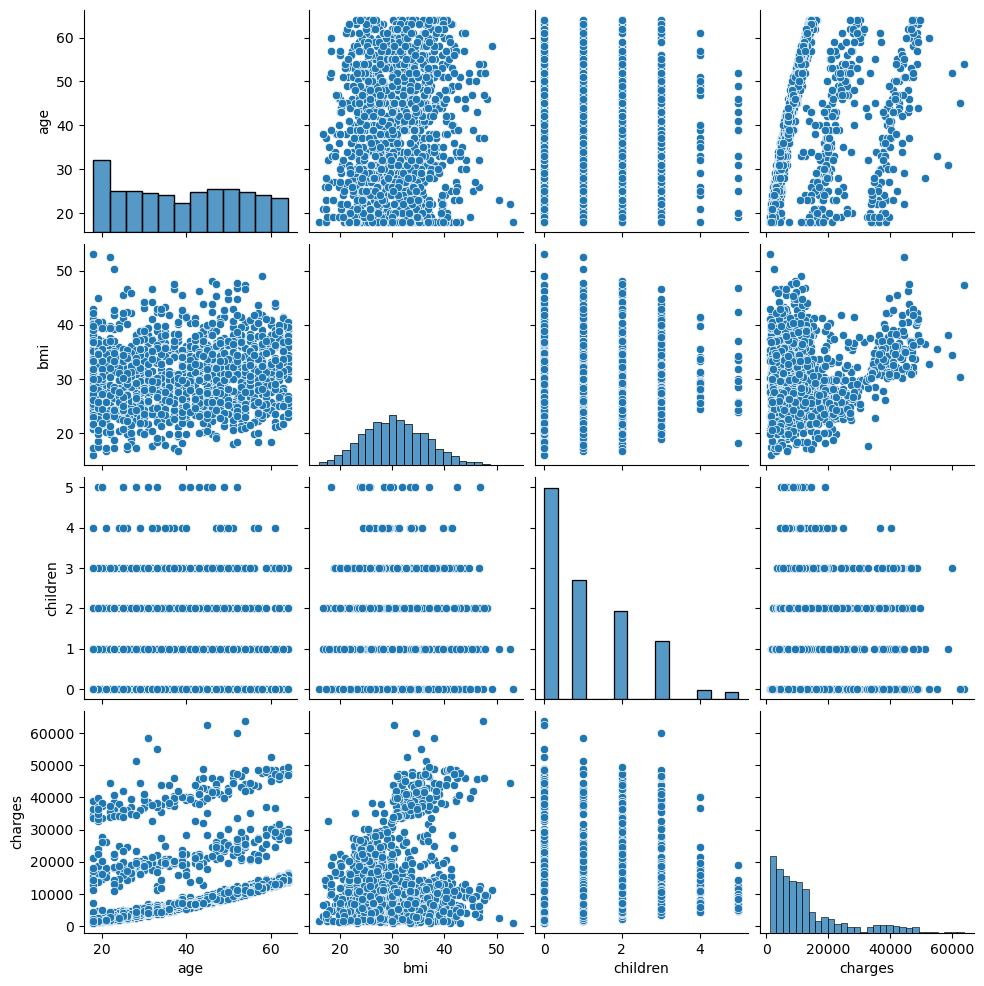

In [24]:
sns.pairplot(data)

C:\Users\gauth\AppData\Local\Temp\ipykernel_2140\3262849815.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])
C:\Users\gauth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

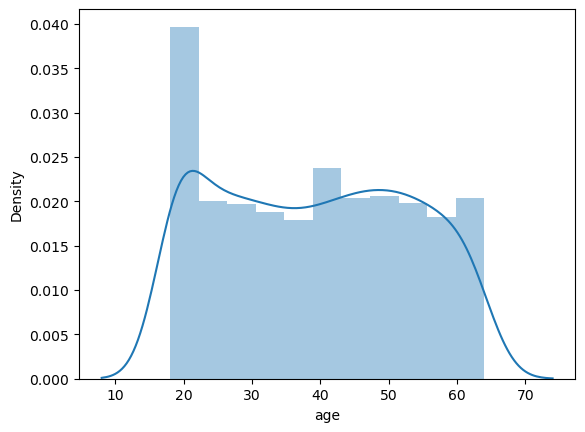

In [25]:
sns.distplot(data['age'])

In [28]:
from sklearn.preprocessing import OneHotEncoder
encoded_data = data.copy()


data = pd.get_dummies(encoded_data, columns=['sex', 'region','smoker'], drop_first=True)


In [29]:
x = data.drop('charges', axis=1)
y = data['charges']

<Axes: >

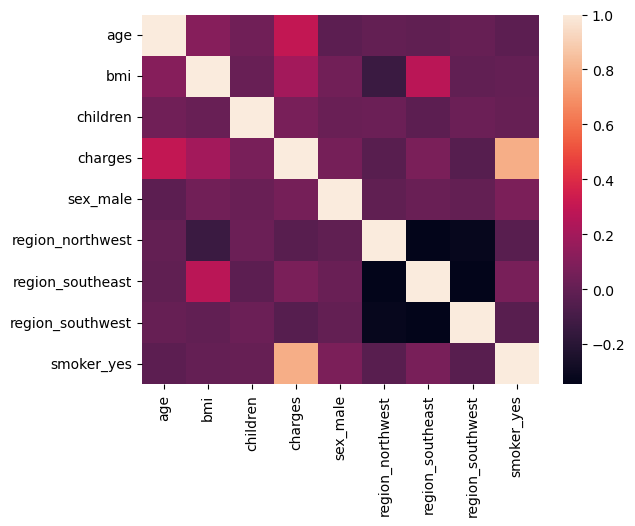

In [30]:
sns.heatmap(data.corr())

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [32]:
data.head()

age     bmi  children      charges  sex_male  region_northwest  \
0   19  27.900         0  16884.92400     False             False   
1   18  33.770         1   1725.55230      True             False   
2   28  33.000         3   4449.46200      True             False   
3   33  22.705         0  21984.47061      True              True   
4   32  28.880         0   3866.85520      True              True   

   region_southeast  region_southwest  smoker_yes  
0             False              True        True  
1              True             False       False  
2              True             False       False  
3             False             False       False  
4             False             False       False

**Methodology AND  Result Analysis**

In [33]:
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.metrics import mean_squared_error




# Define decision tree parameters
max_depth_values = [3, 5, None]  # Depth values to iterate over
criteria = ['squared_error', 'friedman_mse']  # Split criterion

# Initialize an empty list to store results
result_list = []

# Counter for number of models
model_counter = 0

# Loop over different max_depth values for each criterion
for criterion_val in criteria:
    for max_depth in max_depth_values:
        # Initialize and fit the model
        model = DecisionTreeRegressor(max_depth=max_depth, criterion=criterion_val, random_state=42)
        model.fit(x_train, y_train)

        # Predict on the test set
        y_pred = model.predict(x_test)

        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r_squared = r2_score(y_test, y_pred)

        # Print the decision tree
        model_counter += 1
        print(f"Decision Tree {model_counter} (Max Depth: {max_depth}, Criterion: {criterion_val}):")
        tree_text = export_text(model, feature_names=list(x.columns))
        print(tree_text)
        print()

        # Append results to the result list
        result_list.append({'Max Depth': max_depth, 'Criterion': criterion_val, 'MSE': mse, 'MAE': mae, 'R-squared': r_squared})

# Convert the result list to a DataFrame
result_table = pd.DataFrame(result_list)




Decision Tree 1 (Max Depth: 3, Criterion: squared_error):
|--- smoker_yes <= 0.50
|   |--- age <= 43.50
|   |   |--- age <= 26.50
|   |   |   |--- value: [4042.61]
|   |   |--- age >  26.50
|   |   |   |--- value: [6599.95]
|   |--- age >  43.50
|   |   |--- age <= 51.50
|   |   |   |--- value: [10427.82]
|   |   |--- age >  51.50
|   |   |   |--- value: [13872.60]
|--- smoker_yes >  0.50
|   |--- bmi <= 30.01
|   |   |--- age <= 41.00
|   |   |   |--- value: [18540.38]
|   |   |--- age >  41.00
|   |   |   |--- value: [25245.72]
|   |--- bmi >  30.01
|   |   |--- age <= 42.00
|   |   |   |--- value: [38230.01]
|   |   |--- age >  42.00
|   |   |   |--- value: [45690.05]


Decision Tree 2 (Max Depth: 5, Criterion: squared_error):
|--- smoker_yes <= 0.50
|   |--- age <= 43.50
|   |   |--- age <= 26.50
|   |   |   |--- children <= 1.50
|   |   |   |   |--- age <= 22.50
|   |   |   |   |   |--- value: [2793.29]
|   |   |   |   |--- age >  22.50
|   |   |   |   |   |--- value: [4345.86]
| 

In [36]:
result_table

Max Depth      Criterion           MSE          MAE  R-squared
0        3.0  squared_error  2.078248e+07  2690.276900   0.860782
1        5.0  squared_error  2.119546e+07  2491.107164   0.858016
2        NaN  squared_error  3.946485e+07  2886.418592   0.735633
3        3.0   friedman_mse  2.078248e+07  2690.276900   0.860782
4        5.0   friedman_mse  2.119546e+07  2491.107164   0.858016
5        NaN   friedman_mse  3.974123e+07  2905.321888   0.733782

In [ ]:
**Conclusion**